In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install catboost

In [3]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [4]:
df=pd.read_csv("cleaned_stu_data.csv")
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


preparing x and y variables

In [5]:
x=df.drop(columns=["math score"],axis=1)
y=df["math score"]

Performing Encoding and standardization

In [6]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
one_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",one_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [7]:
x=preprocessor.fit_transform(x)

In [8]:
x.shape

(993, 21)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(744, 21) (249, 21) (744,) (249,)


Create an evaluate function to give all metrics after model training

In [11]:
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mean_squared_error(true,predicted))
  r2_square=r2_score(true,predicted)
  return mae,rmse,r2_square

In [12]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGB regressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)

  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print("model performance for training set")
  print("root mean squared error:{:.4f}".format(model_train_rmse))
  print("root mean absolute error:{:.4f}".format(model_train_mae))
  print("r2 score:{:.4f}".format(model_train_r2))

  print("============================================================")

  print("model performance for test set")
  print("root mean squared error:{:.4f}".format(model_test_rmse))
  print("root mean absolute error:{:.4f}".format(model_test_mae))
  print("r2 score:{:.4f}".format(model_train_r2))
  r2_list.append(model_test_r2)

  print("=================================================================")
  print("\n")

Linear Regression
model performance for training set
root mean squared error:0.0000
root mean absolute error:0.0000
r2 score:1.0000
model performance for test set
root mean squared error:0.0000
root mean absolute error:0.0000
r2 score:1.0000


Lasso
model performance for training set
root mean squared error:4.7725
root mean absolute error:3.7590
r2 score:0.8928
model performance for test set
root mean squared error:4.6343
root mean absolute error:3.7390
r2 score:0.8928


Ridge
model performance for training set
root mean squared error:0.3435
root mean absolute error:0.2728
r2 score:0.9994
model performance for test set
root mean squared error:0.3549
root mean absolute error:0.2852
r2 score:0.9994


K-Neighbors Regressor
model performance for training set
root mean squared error:4.2866
root mean absolute error:3.4231
r2 score:0.9135
model performance for test set
root mean squared error:4.9815
root mean absolute error:4.0418
r2 score:0.9135


Decision Tree
model performance for training

Results

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["model_name","r2_score"]).sort_values(by=["r2_score"],ascending=False)

,model_name,r2_score
0,Linear Regression,1.000000
2,Ridge,0.999423
6,XGB regressor,0.977721
7,CatBoosting Regressor,0.974120
5,RandomForestRegressor,0.964175
8,AdaBoost Regressor,0.921806
4,Decision Tree,0.921387
1,Lasso,0.901706
3,K-Neighbors Regressor,0.886428


Linear Regression

In [14]:
lin_model=LinearRegression()
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of the model is %.2f"%score)

accuracy of the model is 100.00


plotting y_pred and y_test

Text(0, 0.5, 'Predicted')

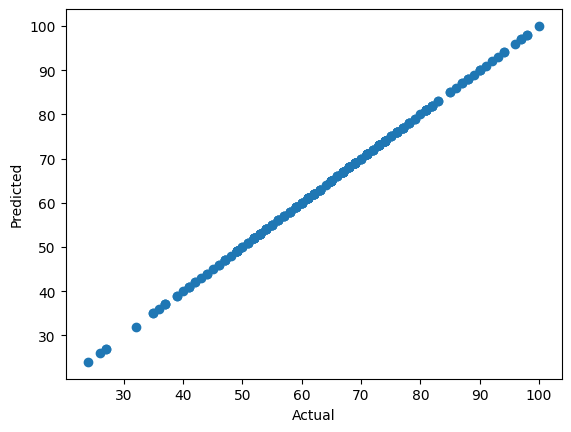

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

Difference between Actual and Predicted values

In [16]:
pred_df=pd.DataFrame({"Actual value":y_test,"Predicted value":y_pred,"Diffrence":y_test-y_pred})
pred_df

,Actual value,Predicted value,Diffrence
918,74,74.0,0.000000e+00
525,62,62.0,-1.421085e-14
567,91,91.0,-1.989520e-13
656,73,73.0,4.263256e-14
915,35,35.0,1.847411e-13
...,...,...,...
490,54,54.0,4.973799e-14
675,67,67.0,-1.421085e-14
892,67,67.0,1.136868e-13
208,35,35.0,3.481659e-13
